# K_Means Clustering And Elbow method

## IMports and Data Load

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#dropping the sepal column because we do not need them for this exercise
df.drop(["sepal length (cm)", "sepal width (cm)"], axis="columns", inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Checking Data Scattering

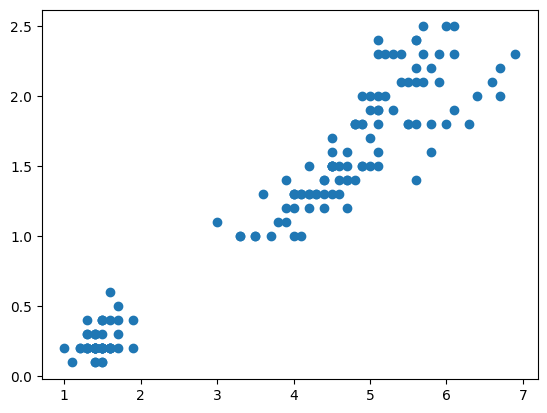

In [5]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

*Scale is comparable on x and y, we do not need to scale features*

## Predicting same type of flower through clustering

In [7]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

## Visualizing Prediction

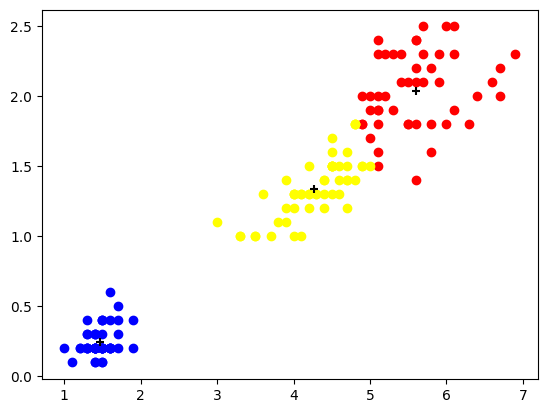

In [12]:
#appending prediction colulmn
df["clusters"] = y_predicted

#plotting different clusters
plt.scatter(df["petal length (cm)"][df.clusters==0], df["petal width (cm)"][df.clusters==0], color="blue")
plt.scatter(df["petal length (cm)"][df.clusters==1], df["petal width (cm)"][df.clusters==1], color="red")
plt.scatter(df["petal length (cm)"][df.clusters==2], df["petal width (cm)"][df.clusters==2], color="yellow")

#plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="black", marker="+")

😘

## Elbow Method

### Calculating SSE

In [13]:
k_rng = range(1,11)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df.drop(["clusters"], axis="columns"))
    sse.append(km.inertia_)     #inertia_ stores the sum of squared error for km, which we try to find using elbow method

sse

[550.8953333333334,
 86.39021984551397,
 31.37135897435897,
 19.48300089968511,
 13.983213141025638,
 11.147086299967423,
 10.99333075619227,
 8.099060606060608,
 7.800877025394053,
 6.0986768476621425]

### Plotting

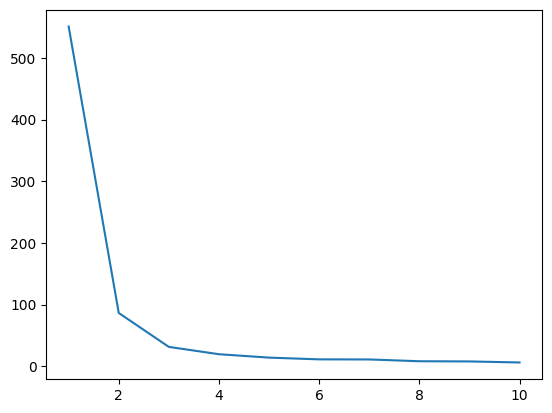

In [16]:
plt.plot(k_rng, sse)

On elbow is 3, as we guessed